In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [12]:
df1= pd.read_csv('./eda_feature_engineered.csv')
df1.dropna(subset=['Total_Sqft', 'SalePrice'], inplace=True)

In [13]:
df1.corr(numeric_only = True)

,Id,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Total_Sqft
Id,1.000000,0.032829,-0.061629,-0.026007,-0.064521,-0.090223,-0.035539,0.008555,-0.038346,-0.022704,...,-0.037639,-0.050850,-0.048756,-0.045278,-0.009102,0.001328,0.127682,-0.975747,-0.051518,-0.035096
Lot Area,0.032829,1.000000,0.105448,-0.018806,0.035757,0.050323,0.169237,0.041184,0.277175,0.381469,...,0.289277,0.004473,0.214724,0.263103,0.155439,0.140681,0.002957,-0.029406,0.296328,0.360591
Overall Qual,-0.061629,0.105448,1.000000,-0.081907,0.602777,0.584168,0.438541,0.275773,0.548742,0.476955,...,0.388540,0.574120,0.587151,0.563578,0.256724,0.308544,0.018671,-0.011461,0.800027,0.665615
Overall Cond,-0.026007,-0.018806,-0.081907,1.000000,-0.370666,0.043693,-0.135582,-0.130521,-0.158643,-0.150587,...,-0.005879,-0.331167,-0.167979,-0.137431,0.011504,-0.051841,-0.002631,0.047576,-0.096277,-0.145466
Year Built,-0.064521,0.035757,0.602777,-0.370666,1.000000,0.628958,0.329589,0.136662,0.410254,0.323127,...,0.168529,0.825233,0.542353,0.486986,0.216102,0.207564,-0.007422,-0.003489,0.571646,0.412684
Year Remod/Add,-0.090223,0.050323,0.584168,0.043693,0.628958,1.000000,0.211142,0.160066,0.308545,0.243837,...,0.138242,0.673687,0.441386,0.398623,0.215859,0.264114,0.010935,0.042908,0.549923,0.395620
Mas Vnr Area,-0.035539,0.169237,0.438541,-0.135582,0.329589,0.211142,1.000000,0.085853,0.408575,0.391234,...,0.268922,0.266506,0.361047,0.384573,0.163413,0.163323,-0.001698,-0.018673,0.512118,0.468395
Bsmt Unf SF,0.008555,0.041184,0.275773,-0.130521,0.136662,0.160066,0.085853,1.000000,0.419238,0.302299,...,0.001821,0.177751,0.167905,0.145080,-0.034438,0.116019,0.020043,-0.043683,0.190210,0.347505
Total Bsmt SF,-0.038346,0.277175,0.548742,-0.158643,0.410254,0.308545,0.408575,0.419238,1.000000,0.808756,...,0.333100,0.348384,0.432979,0.488805,0.224659,0.257227,0.003915,-0.004280,0.628925,0.821524
1st Flr SF,-0.022704,0.381469,0.476955,-0.150587,0.323127,0.243837,0.391234,0.302299,0.808756,1.000000,...,0.394549,0.263800,0.438805,0.498570,0.226057,0.258897,0.026778,-0.007376,0.618380,0.785317


In [14]:
df1['Year Remod/Add * Overall Qual'] = df1['Year Remod/Add'] * df1['Overall Qual']

In [15]:
features = ['Total_Sqft','Lot Area','Year Remod/Add','Overall Qual','Bsmt Unf SF','Year Remod/Add * Overall Qual']
X = df1[features].values
y = df1['SalePrice'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#imported again due to some glitch/bug that it said tensorflow wasnt imported
import tensorflow as tf

# Create a different neural network model
# Adjust dropout rates or try different regularization techniques
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='swish', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Increased dropout rate
    tf.keras.layers.Dense(128, activation='swish'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='swish'),
    tf.keras.layers.Dense(1)
])

# Optimizers and learning rates
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Specifying learning rate within Adam optimizer
model2.compile(optimizer=optimizer, loss='mean_squared_error')



# Train the model
model2.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model
y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred2)
print('Mean Squared Error (Model 2):', mse2)

errorr = y_test-y_pred2
print('the error is: ', errorr)

r2_2 = r2_score(y_test, y_pred2)
print('R^2 Score (Model 2):', r2_2)




Epoch 1/50
52/52 - 1s - 22ms/step - loss: 39386230784.0000
Epoch 2/50
52/52 - 0s - 2ms/step - loss: 39281438720.0000
Epoch 3/50
52/52 - 0s - 2ms/step - loss: 38336004096.0000
Epoch 4/50
52/52 - 0s - 2ms/step - loss: 34782752768.0000
Epoch 5/50
52/52 - 0s - 2ms/step - loss: 26968582144.0000
Epoch 6/50
52/52 - 0s - 2ms/step - loss: 17570146304.0000
Epoch 7/50
52/52 - 0s - 2ms/step - loss: 13053611008.0000
Epoch 8/50
52/52 - 0s - 2ms/step - loss: 12003186688.0000
Epoch 9/50
52/52 - 0s - 2ms/step - loss: 11137826816.0000
Epoch 10/50
52/52 - 0s - 2ms/step - loss: 10275622912.0000
Epoch 11/50
52/52 - 0s - 2ms/step - loss: 9573906432.0000
Epoch 12/50
52/52 - 0s - 2ms/step - loss: 8551861248.0000
Epoch 13/50
52/52 - 0s - 2ms/step - loss: 7253429248.0000
Epoch 14/50
52/52 - 0s - 2ms/step - loss: 6686980608.0000
Epoch 15/50
52/52 - 0s - 2ms/step - loss: 5753143808.0000
Epoch 16/50
52/52 - 0s - 2ms/step - loss: 4906069504.0000
Epoch 17/50
52/52 - 0s - 2ms/step - loss: 4262382080.0000
Epoch 18/50


c:\Users\safiu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


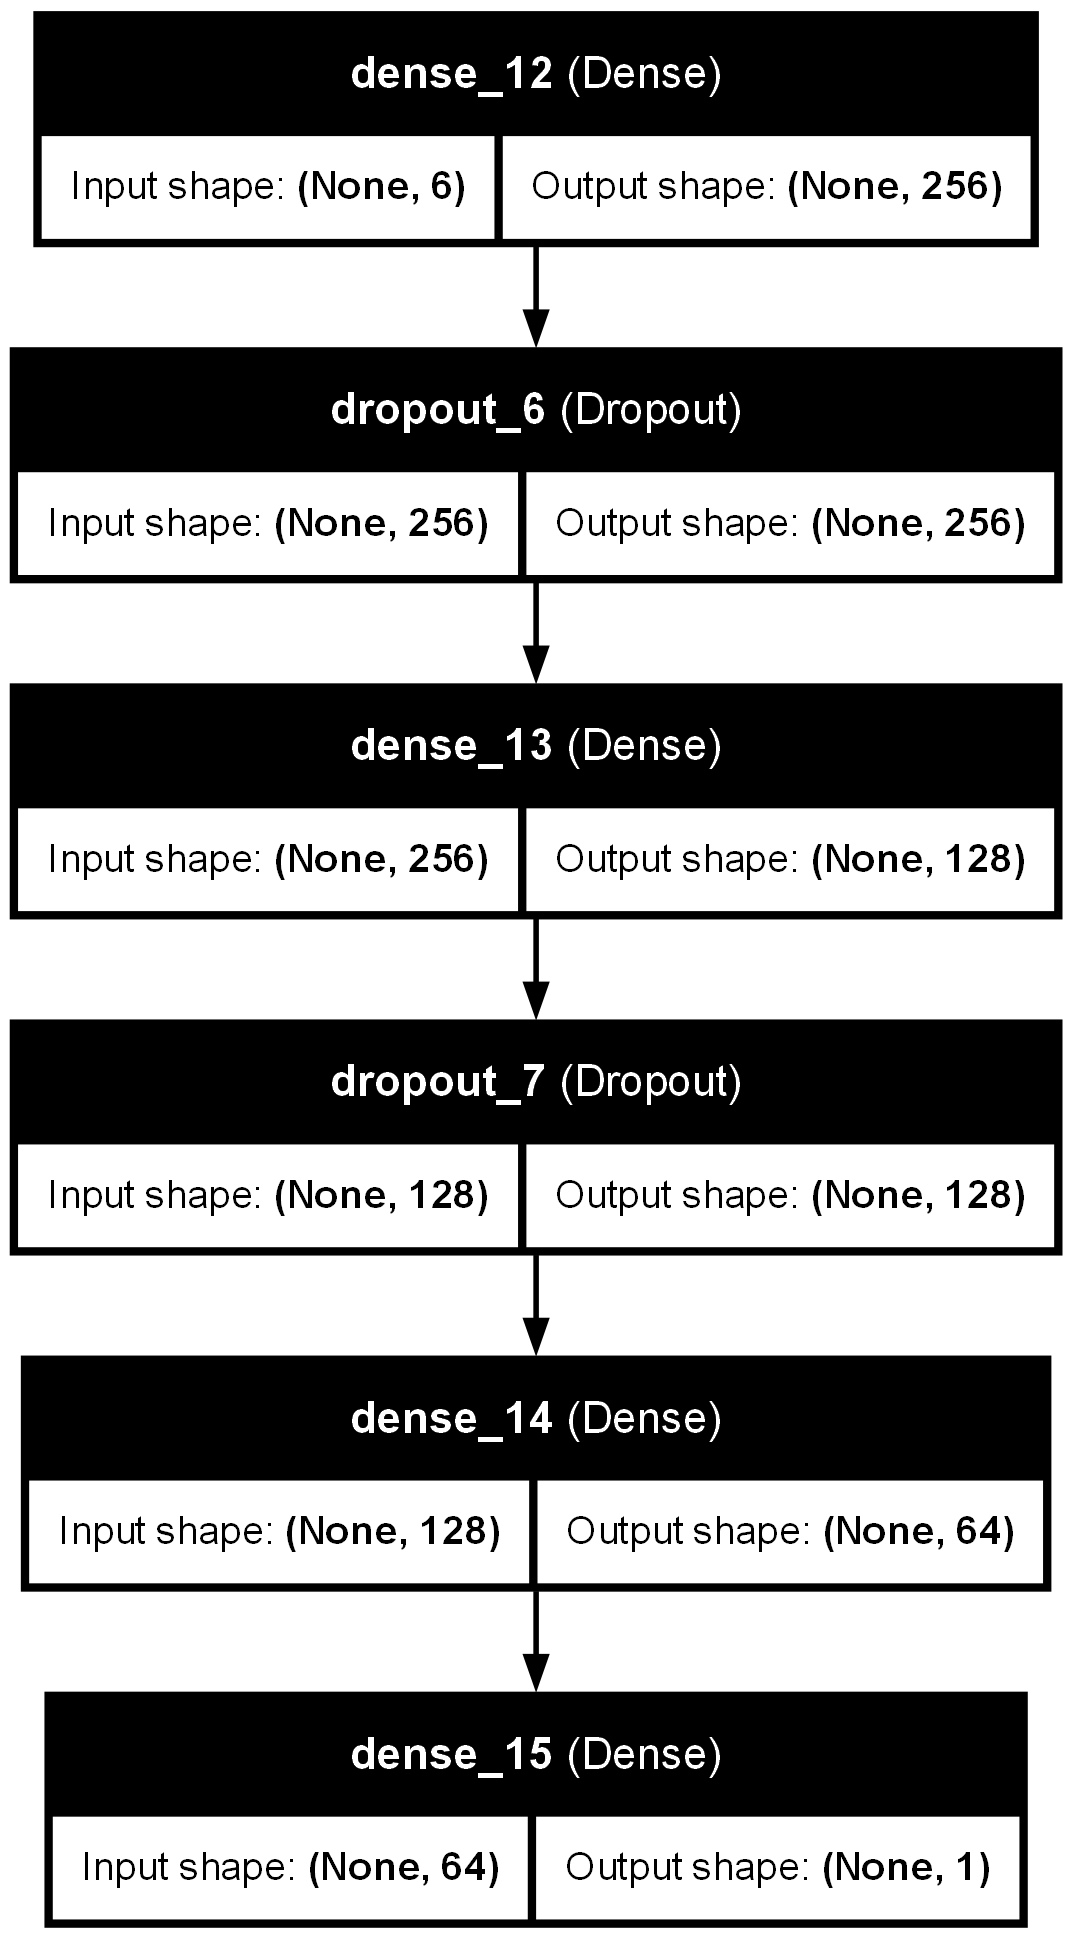

In [ ]:
# For Visual Representation only


import tensorflow as tf
from tensorflow.keras.utils import model_to_dot
from IPython.display import Image

# Define the architecture of Model 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='swish', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(128, activation='swish'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='swish'),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  
model2.compile(optimizer=optimizer, loss='mean_squared_error')

# Convert the model architecture to a DOT format
dot_model = model_to_dot(model2, show_shapes=True, show_layer_names=True)

# Save the DOT file
dot_model.write('model2.dot')

# Convert the DOT file to an image (PNG format)
!dot -Tpng model2.dot -o model2.png

# Display the image
Image('model2.png')
